# Load Data

In [68]:
import os
import json
import pandas as pd

# constants
BASE_DIR = "C://Users/mrx379/Documents/GitHub/ct16_cap1_ds5/project_1/data"
MOJO_DIR = os.path.join(BASE_DIR, 'boxofficemojo')
META_DIR = os.path.join(BASE_DIR, 'metacritic')

# Create DataFrame

movies = []

NameList = [name for name in os.listdir(MOJO_DIR) if ".json" in name] 
# to avoid any non json file related failure

for i in NameList:
    target_file_path = os.path.join(MOJO_DIR, i)
    with open(target_file_path, 'r') as target_file:
        movie = json.load(target_file)
        movies.append(movie)

mojo_movies_df = pd.DataFrame(movies)

NameList = [name for name in os.listdir(META_DIR) if ".json" in name] 
movies = []

for i in NameList:
    target_file_path = os.path.join(META_DIR, i)
    with open(target_file_path, 'r') as target_file:
        movie = json.load(target_file)
        if type(movie) is not dict:
            continue
        else:
            movies.append(movie)

meta_movies_df = pd.DataFrame(movies)

# Clean Data

In [69]:
mojo_movies_df['title_cln'] = mojo_movies_df['title']
meta_movies_df['title_cln'] = meta_movies_df['title']

def clean(dataframe, columnname):
    dataframe[columnname].replace("\\.", "",inplace=True, regex = True)
    dataframe[columnname].replace(",", "",inplace=True, regex = True)
    dataframe[columnname].replace(":", "",inplace=True, regex = True)
    dataframe[columnname].replace("'", "",inplace=True, regex = True)
    dataframe[columnname].replace("!", "",inplace=True, regex = True)
    dataframe[columnname].replace("-", "",inplace=True, regex = True)
    dataframe[columnname].replace("\\?", "",inplace=True, regex = True)
    dataframe[columnname].replace("\([^)]*\)", "",inplace=True, regex = True)
    dataframe[columnname].replace(" ", "",inplace=True, regex = True)
    dataframe[columnname]= dataframe[columnname].str.lower()
    
clean(mojo_movies_df, 'title_cln')
clean(meta_movies_df, 'title_cln')

mojo_clean = mojo_movies_df[pd.notnull(mojo_movies_df['title_cln'])]
meta_clean = meta_movies_df[pd.notnull(meta_movies_df['title_cln'])]

movie_db = pd.merge(mojo_clean, meta_clean, on = 'title_cln', suffixes = ('_mojo', '_meta'), how = 'outer')

movie_db['user_score'] = movie_db['user_score'].convert_objects(convert_numeric=True) 

keepers = ['domestic_gross', 'opening_per_theater', 'opening_weekend_take', 'production_budget', 'title_cln', 'widest_release', 
           'worldwide_gross', 'year_meta', 'year_mojo', 'director_meta', 'genre', 'metascore', 'num_critic_reviews', 'num_user_ratings',
           'num_user_reviews', 'rating', 'release_date', 'runtime_minutes', 'studio', 'user_score']

movie_all = movie_db[keepers]


In [70]:
movie_all.to_csv("test.csv", sep=",", encoding='utf-8')

In [71]:
movie_final = pd.read_csv('test.csv')

In [72]:
#movie_final.head()

In [73]:
#movie_final.isnull().sum()

In [74]:
#list(movie_final) 

In [75]:
#movie_final.describe()

# Prepare for modleing
- create season dummies
- missing imputation for X
- drop missing Y

In [76]:
#features = ['widest_release',
#           'metascore',
#           'runtime_minutes']
#opening_weekend_take, opening_per_theater, num_user_ratings

#movie_model_1=movie_final.fillna(movie_final.mean()[features])
 
#related_columns = features + ['domestic_gross']

#movie_model_1 = movie_model_1[related_columns].dropna() 

In [77]:
# Creating Month
movie_final['month'] = pd.DataFrame([pd.to_datetime(date) for date in movie_final['release_date']])

movie_final['month'] = movie_final['month'].dt.month

#a = movie_final['month'].dropna()
#plt.hist(a)

# Create Seasons
movie_final['Season'] = np.nan
idx = movie_final['month'].isin([2,3,4])
movie_final['Season'][idx] = 1
idx = movie_final['month'].isin([5,6,7])
movie_final['Season'][idx] = 2
idx = movie_final['month'].isin([8,9,10])
movie_final['Season'][idx] = 3
idx = movie_final['month'].isin([11,12,1])
movie_final['Season'][idx] = 4 

new_list=['season_1','season_2','season_3','season_4']
movie_final[new_list]=pd.get_dummies(movie_final['Season'], prefix = 'Season') 

c:\Users\mrx379\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\mrx379\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\mrx379\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\mrx379\AppData\Local\Continuum\Anaconda\lib

In [78]:
movie_model = movie_final.dropna(subset=['domestic_gross']) 
#movie_final.dropna(subset=['domestic_gross'], inplace=True) -- if wants to overwrite the old df

movie_model=movie_model.fillna(movie_model.mean())

In [79]:
movie_model.isnull().sum()

Unnamed: 0                0
domestic_gross            0
opening_per_theater       0
opening_weekend_take      0
production_budget         0
title_cln                 0
widest_release            0
worldwide_gross           0
year_meta                 0
year_mojo                 0
director_meta           147
genre                   149
metascore                 0
num_critic_reviews      146
num_user_ratings          0
num_user_reviews        146
rating                  246
release_date            146
runtime_minutes           0
studio                  196
user_score                0
month                     0
Season                    0
season_1                  0
season_2                  0
season_3                  0
season_4                  0
dtype: int64

In [81]:
movie_model.describe()

,Unnamed: 0,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year_meta,year_mojo,metascore,num_user_ratings,runtime_minutes,user_score,month,Season,season_1,season_2,season_3,season_4
count,3694.000000,3.694000e+03,3694.000000,3.694000e+03,3.694000e+03,3694.000000,3.694000e+03,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000
mean,1884.636979,3.574326e+07,7752.573898,8.886941e+06,4.600159e+07,1355.833149,9.112755e+07,2005.772266,2004.867352,57.779632,123.414884,107.503004,6.835921,6.948140,2.529030,0.234164,0.215485,0.279372,0.231456
std,1088.142820,5.641706e+07,8097.626545,1.378844e+07,2.671571e+07,1278.570726,1.303527e+08,7.466252,8.492698,17.586498,213.267291,18.967169,1.331067,3.322557,1.082066,0.423532,0.411214,0.448751,0.421820
min,0.000000,7.200000e+01,72.000000,7.200000e+01,2.200000e+02,1.000000,7.200000e+01,1962.000000,1940.000000,1.000000,4.000000,40.000000,1.400000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,943.250000,6.288795e+05,3298.500000,5.078075e+04,4.000000e+07,54.250000,1.145185e+07,2002.000000,2001.000000,46.000000,26.000000,94.000000,6.100000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1885.500000,1.317841e+07,5675.000000,3.733336e+06,4.600159e+07,1136.500000,7.763963e+07,2007.000000,2007.000000,57.779632,65.000000,105.000000,6.900000,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,2824.750000,4.947995e+07,9262.750000,1.220687e+07,4.600159e+07,2560.250000,9.112755e+07,2011.000000,2011.000000,71.000000,123.414884,116.000000,7.900000,10.000000,3.000000,0.000000,0.000000,1.000000,0.000000
max,3768.000000,7.605076e+08,204230.000000,1.741446e+08,2.150000e+08,4468.000000,2.787965e+09,2015.000000,2015.000000,100.000000,4002.000000,325.000000,9.500000,12.000000,4.000000,1.000000,1.000000,1.000000,1.000000


# Build a model

In [34]:
features = ['widest_release',
           'metascore',
           'runtime_minutes']
#opening_weekend_take, opening_per_theater, num_user_ratings 
  
import statsmodels.api as sm
Y = movie_model_1['domestic_gross']
X = sm.add_constant(movie_model_1[features])
model_1 = sm.OLS(Y, X).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1244.
Date:                Fri, 13 May 2016   Prob (F-statistic):               0.00
Time:                        10:25:09   Log-Likelihood:                -69882.
No. Observations:                3694   AIC:                         1.398e+05
Df Residuals:                    3690   BIC:                         1.398e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const           -8.019e+07   4.12e+06    -19.484      0.000     -8.83e+07 -7.21e+07
widest_release   3.176e+04    543.215     58.466      0.000      3.07e+04  3.28e+04
metascore        7.262e+05   4.02e+04     18.043      0.000      6.47e+05  8.05e+05
runtime_minutes  2.879e+05   3.58e+04      8.052      0.000      2.18e+05  3.58e+05
==============================================================================
Omnibus:                     3455.497   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251395.857
Skew:                           4.259   Prob(JB):                         0.00
Kurtosis:                      42.506   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
import numpy as np 
Y = np.log(movie_model_1.domestic_gross)
X = sm.add_constant(movie_model_1[features])
model_log_y = sm.OLS(Y, X).fit()
model_log_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     2696.
Date:                Fri, 13 May 2016   Prob (F-statistic):               0.00
Time:                        10:25:10   Log-Likelihood:                -7033.2
No. Observations:                3694   AIC:                         1.407e+04
Df Residuals:                    3690   BIC:                         1.410e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               9.5567      0.168     56.857      0.000         9.227     9.886
widest_release      0.0019   2.22e-05     86.587      0.000         0.002     0.002
metascore           0.0298      0.002     18.149      0.000         0.027     0.033
runtime_minutes     0.0142      0.001      9.697      0.000         0.011     0.017
==============================================================================
Omnibus:                      308.939   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.401
Skew:                          -0.652   Prob(JB):                    8.70e-102
Kurtosis:                       4.151   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

:0: FutureWarning: IPython widgets are experimental and may change in the future.


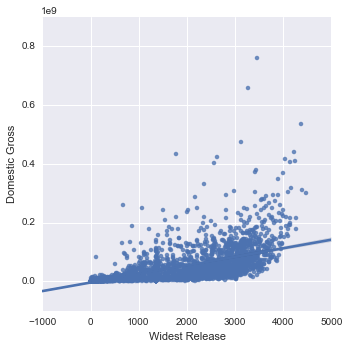

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('widest_release', 'domestic_gross', 
           data=movie_model_1, 
           fit_reg=True) 
plt.xlabel('Widest Release')
plt.ylabel('Domestic Gross')

# in *.py or at >>> prompt .... now do:
# plt.show() --> might be able Ctl-S
# plt.savefig(figure, "foo.png") ---> png file

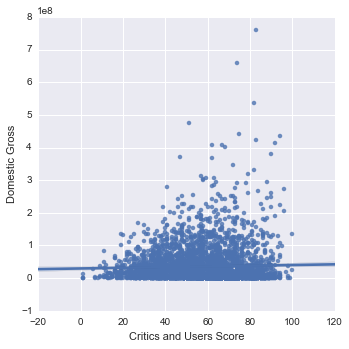

In [37]:
sns.lmplot('metascore', 'domestic_gross', 
           data=movie_model_1, 
           fit_reg=True) 
plt.xlabel('Critics and Users Score')
plt.ylabel('Domestic Gross')

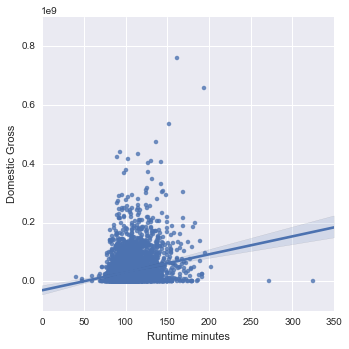

In [38]:
sns.lmplot('runtime_minutes', 'domestic_gross', 
           data=movie_model_1, 
           fit_reg=True) 
plt.xlabel('Runtime minutes')
plt.ylabel('Domestic Gross')

In [39]:
features = ['opening_per_theater',
            'opening_weekend_take',
            'widest_release',
            'metascore',
            'runtime_minutes']


related_columns = features + ['domestic_gross']


print related_columns

['opening_per_theater', 'opening_weekend_take', 'widest_release', 'metascore', 'runtime_minutes', 'domestic_gross']


In [40]:
# build the model
import statsmodels.api as sm
Y = clean_top_dir_movies['domestic_gross']
X = sm.add_constant(clean_top_dir_movies[features])
director_model = sm.OLS(Y, X).fit()
director_model.summary()

NameError: name 'clean_top_dir_movies' is not defined